# Init.

In [1]:
import pandas as pd      # untuk membaca file CSV
import matplotlib.pyplot as plt   # untuk visualisasi dasar
import seaborn as sns             # untuk visualisasi yang lebih cantik

from sklearn.decomposition import PCA   # untuk reduksi dimensi
from sklearn.cluster import KMeans      # algoritma clustering K-Means
from sklearn.preprocessing import StandardScaler  # untuk standarisasi data
from sklearn.metrics import silhouette_score      # untuk evaluasi kualitas cluster

import warnings
warnings.filterwarnings("ignore")  # supaya output bersih


# Data Prep.

In [ ]:
# 1. Load Dataset
#Cek jumlah baris & kolom.
df = pd.read_csv("data/Mall_Customers.csv")
print("5 Data Teratas ")
display(df.head())
print(f"\nJumlah baris: {df.shape[0]}")
print(f"Jumlah kolom: {df.shape[1]}")
print(f"Nama kolom: {list(df.columns)}\n")


5 Data Teratas 


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40



Jumlah baris: 200
Jumlah kolom: 5
Nama kolom: ['CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']



In [ ]:
# 2️. Cek info dasar
print("\nInfo Data : ")
df.info()
print("\nStatistik Deskriptif :")
display(df.describe())


Info Data : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB

Statistik Deskriptif :


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
# 3. Cek missing values
print("\nMissing Values :")
print(df.isnull().sum())


Missing Values :
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [5]:
# 4. Cek duplicate
print("\nJumlah data duplikat:", df.duplicated().sum())


Jumlah data duplikat: 0


In [6]:
# 5. Ubah Gender ke numerik: Female=0, Male=1
print("\nKonversi Gender ke Numerik\n")
df['Gender_encoded'] = df['Gender'].map({'Female': 0, 'Male': 1})
print("Kolom Gender berhasil diubah menjadi numerik:")
display(df[['Gender', 'Gender_encoded']].head())


Konversi Gender ke Numerik

Kolom Gender berhasil diubah menjadi numerik:


,Gender,Gender_encoded
0,Male,1
1,Male,1
2,Female,0
3,Female,0
4,Female,0


# Pemilihan Fitur

In [ ]:
# Definisi Fitur Untuk Dua Skenario
features_skenario1 = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
features_skenario2 = ['Gender_encoded', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

print("\nSkenario 1 (3 fitur):", features_skenario1)
print("Skenario 2 (4 fitur):", features_skenario2)


Skenario 1 (3 fitur): ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
Skenario 2 (4 fitur): ['Gender_encoded', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']


# Scalling

In [8]:
# NORMALISASI (SCALING) 
from sklearn.preprocessing import StandardScaler

print("\nNormalisasi (StandardScaler)\n")

# --- SKENARIO 1: Tanpa Gender ---
print("SKENARIO 1: Tanpa Gender (3 fitur)\n")
scaler_1 = StandardScaler()

# Pelajari nilai mean & std tiap fitur
scaler_1.fit(df[features_skenario1])

# Terapkan scaling ke dataset
X1_scaled = scaler_1.transform(df[features_skenario1])

# Simpan hasil scaling ke DataFrame
df_scaled_1 = pd.DataFrame(X1_scaled, columns=features_skenario1)

# Cek bentuk data dan preview
print("Bentuk data setelah scaling:", df_scaled_1.shape)
print("\nContoh hasil data setelah distandardisasi:")
display(df_scaled_1.head())

# Bandingkan statistik sebelum dan sesudah scaling
print("\nStatistik Data Asli (Skenario 1):")
display(df[features_skenario1].describe().round(2))

print("Statistik Data Setelah Scaling (Skenario 1):")
display(df_scaled_1.describe().round(4))


# --- SKENARIO 2: Dengan Gender ---
print("\nSKENARIO 2: Dengan Gender (4 fitur)\n")
scaler_2 = StandardScaler()

# Pelajari nilai mean & std tiap fitur
scaler_2.fit(df[features_skenario2])

# Terapkan scaling ke dataset
X2_scaled = scaler_2.transform(df[features_skenario2])

# Simpan hasil scaling ke DataFrame
df_scaled_2 = pd.DataFrame(X2_scaled, columns=features_skenario2)

# Cek bentuk data dan preview
print("Bentuk data setelah scaling:", df_scaled_2.shape)
print("\nContoh hasil data setelah distandardisasi:")
display(df_scaled_2.head())

# Bandingkan statistik sebelum dan sesudah scaling
print("\nStatistik Data Asli (Skenario 2):")
display(df[features_skenario2].describe().round(2))

print("Statistik Data Setelah Scaling (Skenario 2):")
display(df_scaled_2.describe().round(4))

print("✅ Hasil scaling menunjukkan semua fitur kini memiliki mean ≈ 0 dan std ≈ 1.\n")



Normalisasi (StandardScaler)

SKENARIO 1: Tanpa Gender (3 fitur)

Bentuk data setelah scaling: (200, 3)

Contoh hasil data setelah distandardisasi:


,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980



Statistik Data Asli (Skenario 1):


,Age,Annual Income (k$),Spending Score (1-100)
count,200.00,200.00,200.00
mean,38.85,60.56,50.20
std,13.97,26.26,25.82
min,18.00,15.00,1.00
25%,28.75,41.50,34.75
50%,36.00,61.50,50.00
75%,49.00,78.00,73.00
max,70.00,137.00,99.00


Statistik Data Setelah Scaling (Skenario 1):


,Age,Annual Income (k$),Spending Score (1-100)
count,200.0000,200.0000,200.0000
mean,-0.0000,-0.0000,-0.0000
std,1.0025,1.0025,1.0025
min,-1.4963,-1.7390,-1.9100
25%,-0.7248,-0.7275,-0.5998
50%,-0.2045,0.0359,-0.0078
75%,0.7284,0.6657,0.8851
max,2.2355,2.9177,1.8945



SKENARIO 2: Dengan Gender (4 fitur)

Bentuk data setelah scaling: (200, 4)

Contoh hasil data setelah distandardisasi:


,Gender_encoded,Age,Annual Income (k$),Spending Score (1-100)
0,1.128152,-1.424569,-1.738999,-0.434801
1,1.128152,-1.281035,-1.738999,1.195704
2,-0.886405,-1.352802,-1.700830,-1.715913
3,-0.886405,-1.137502,-1.700830,1.040418
4,-0.886405,-0.563369,-1.662660,-0.395980



Statistik Data Asli (Skenario 2):


,Gender_encoded,Age,Annual Income (k$),Spending Score (1-100)
count,200.00,200.00,200.00,200.00
mean,0.44,38.85,60.56,50.20
std,0.50,13.97,26.26,25.82
min,0.00,18.00,15.00,1.00
25%,0.00,28.75,41.50,34.75
50%,0.00,36.00,61.50,50.00
75%,1.00,49.00,78.00,73.00
max,1.00,70.00,137.00,99.00


Statistik Data Setelah Scaling (Skenario 2):


,Gender_encoded,Age,Annual Income (k$),Spending Score (1-100)
count,200.0000,200.0000,200.0000,200.0000
mean,0.0000,-0.0000,-0.0000,-0.0000
std,1.0025,1.0025,1.0025,1.0025
min,-0.8864,-1.4963,-1.7390,-1.9100
25%,-0.8864,-0.7248,-0.7275,-0.5998
50%,-0.8864,-0.2045,0.0359,-0.0078
75%,1.1282,0.7284,0.6657,0.8851
max,1.1282,2.2355,2.9177,1.8945


✅ Hasil scaling menunjukkan semua fitur kini memiliki mean ≈ 0 dan std ≈ 1.



# Analisis Fitur 

<Figure size 1000x600 with 0 Axes>

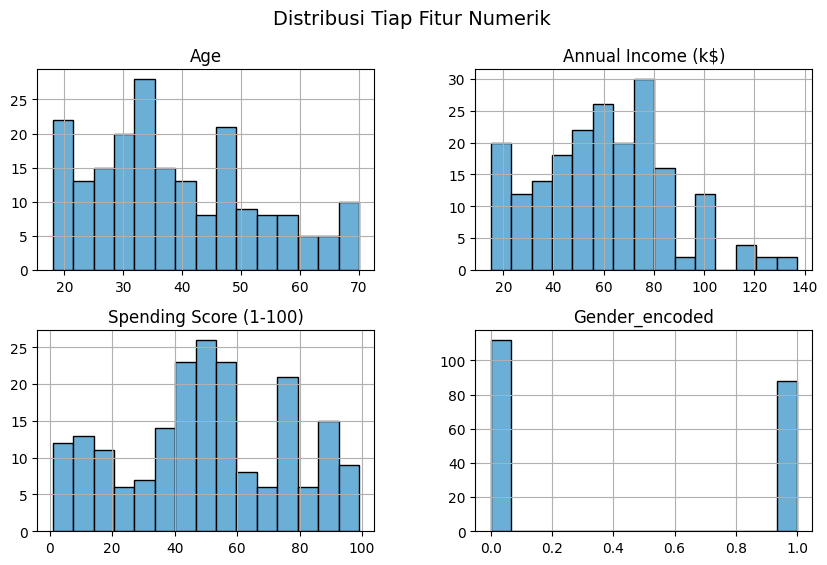

In [9]:
# 1. Distribusi tiap fitur numerik 
num_cols = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_encoded']

plt.figure(figsize=(10,6))
df[num_cols].hist(figsize=(10,6), bins=15, color="#6BAED6", edgecolor="black")
plt.suptitle("Distribusi Tiap Fitur Numerik", fontsize=14)
plt.show()

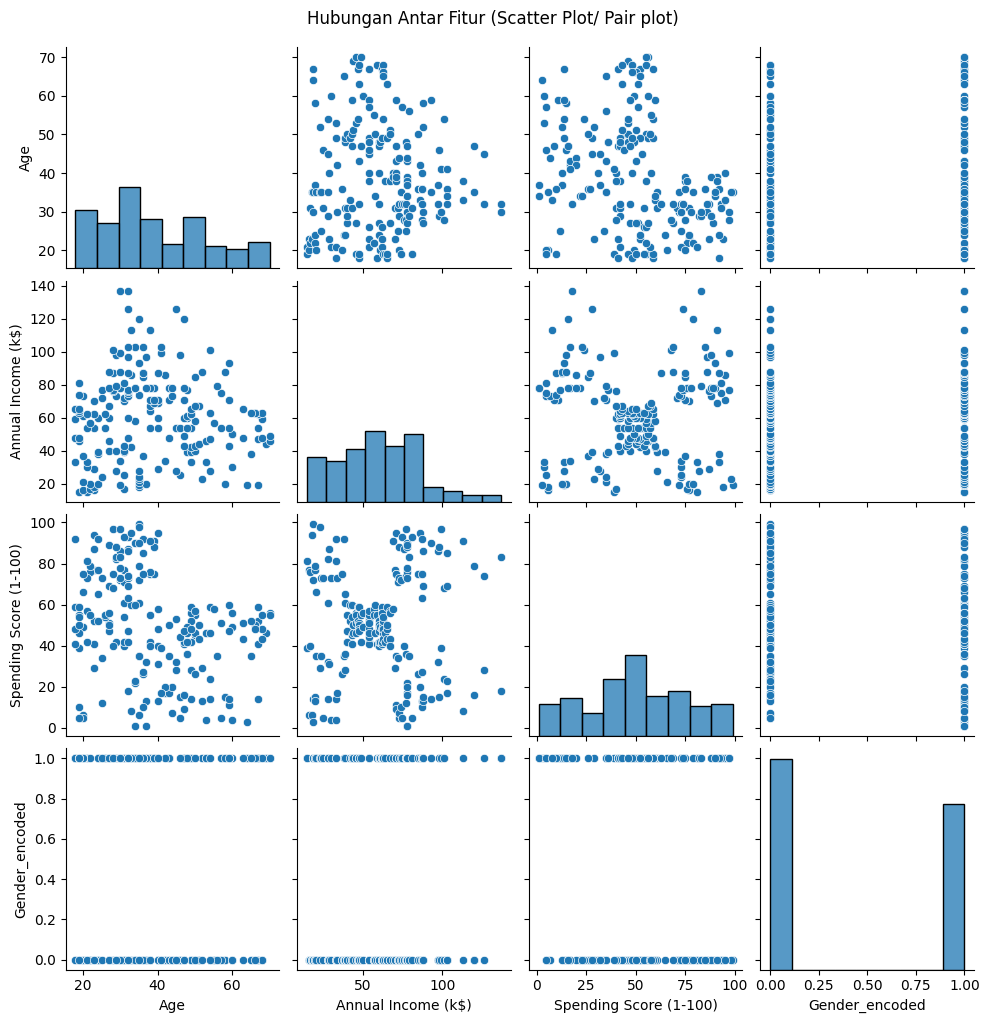

In [10]:
# 2. Analisis hubungan antar fitur 
sns.pairplot(df[num_cols])
plt.suptitle("Hubungan Antar Fitur (Scatter Plot/ Pair plot)", y=1.02)
plt.show()

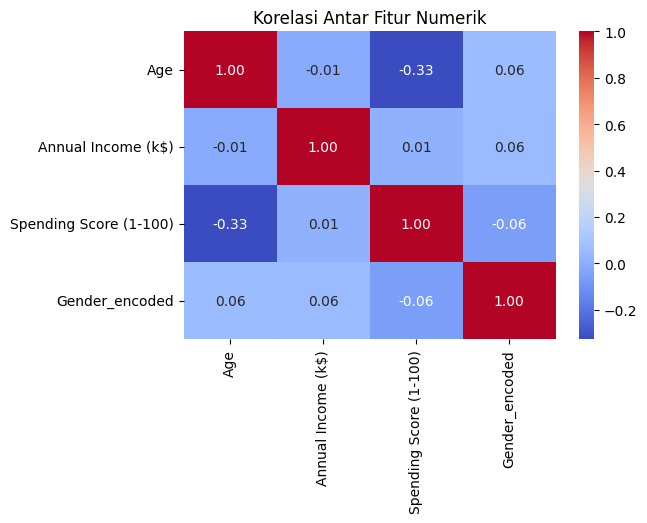

In [11]:
#  3. Heatmap korelasi antar fitur numerik
plt.figure(figsize=(6,4))
sns.heatmap(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_encoded']].corr(), 
            annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Korelasi Antar Fitur Numerik")
plt.show()


In [12]:
# 4. Kesimpulan singkat otomatis 
corr_matrix = df[num_cols].corr().round(2)
max_corr = corr_matrix.where(~corr_matrix.isin([1.0])).max().max()
min_corr = corr_matrix.min().min()

print("\n📊 Ringkasan Korelasi:")
print(corr_matrix)
print(f"\n🔹 Korelasi positif terkuat: {max_corr}")
print(f"🔹 Korelasi negatif terkuat: {min_corr}")

print("""
💬 Interpretasi:
- Pairplot memperlihatkan pola hubungan antar variabel (misal: Income vs Spending Score).
- Heatmap menunjukkan kekuatan hubungan linear antar fitur.
- Korelasi positif → naik bersama, negatif → berlawanan arah.
""")


📊 Ringkasan Korelasi:
                         Age  Annual Income (k$)  Spending Score (1-100)  \
Age                     1.00               -0.01                   -0.33   
Annual Income (k$)     -0.01                1.00                    0.01   
Spending Score (1-100) -0.33                0.01                    1.00   
Gender_encoded          0.06                0.06                   -0.06   

                        Gender_encoded  
Age                               0.06  
Annual Income (k$)                0.06  
Spending Score (1-100)           -0.06  
Gender_encoded                    1.00  

🔹 Korelasi positif terkuat: 0.06
🔹 Korelasi negatif terkuat: -0.33

💬 Interpretasi:
- Pairplot memperlihatkan pola hubungan antar variabel (misal: Income vs Spending Score).
- Heatmap menunjukkan kekuatan hubungan linear antar fitur.
- Korelasi positif → naik bersama, negatif → berlawanan arah.



# Pemodelan

In [89]:
# Baseline dan KMeans
def run_kmeans(X, features, label_name):
    results = []
    for k in range(2,8):
        kmeans = KMeans(n_clusters=k, random_state=42)
        labels = kmeans.fit_predict(X)
        sil = silhouette_score(X, labels)
        results.append((k, sil))
        print(f"{label_name} | k={k} | Silhouette Score={sil:.3f}")
    best_k = max(results, key=lambda x: x[1])[0]
    final_model = KMeans(n_clusters=best_k, random_state=42)
    clusters = final_model.fit_predict(X)
    return best_k, clusters, max(results, key=lambda x: x[1])[1]


def run_baseline(X, n_clusters=3):
    np.random.seed(42)
    random_labels = np.random.randint(0, n_clusters, X.shape[0])
    sil_baseline = silhouette_score(X, random_labels)
    print(f"Baseline Random ({n_clusters} cluster) | Silhouette Score={sil_baseline:.3f}")
    return sil_baseline

# Kombinasi Fitur & Model

In [90]:
# 1. Kombinasi 1: 3 Fitur + Baseline 
print("\nKombinasi 1: 3 Fitur + Baseline (Random Grouping) ")
baseline_score = run_baseline(df_scaled_1, n_clusters=3)
print(f"Baseline (random) Silhouette: {baseline_score:.3f}")


Kombinasi 1: 3 Fitur + Baseline (Random Grouping) 
Baseline Random (3 cluster) | Silhouette Score=-0.024
Baseline (random) Silhouette: -0.024


In [91]:
# 2. Kombinasi 2: 3 Fitur + K-Means 
print("\nKombinasi 2: 3 Fitur + K-Means :")
best_k_3, cluster_3, sil_3 = run_kmeans(df_scaled_1, features_skenario1, "3 Fitur")
df["Cluster_3"] = cluster_3


Kombinasi 2: 3 Fitur + K-Means :
3 Fitur | k=2 | Silhouette Score=0.335
3 Fitur | k=3 | Silhouette Score=0.358
3 Fitur | k=4 | Silhouette Score=0.404
3 Fitur | k=5 | Silhouette Score=0.408
3 Fitur | k=6 | Silhouette Score=0.431
3 Fitur | k=7 | Silhouette Score=0.410


In [92]:
# 3. Kombinasi 3: Semua Fitur + Baseline 
print("\nKombinasi 3: 3 Fitur + Baseline (Random Grouping) ")
baseline_score = run_baseline(df_scaled_2, n_clusters=3)
print(f"Baseline (random) Silhouette: {baseline_score:.3f}")


Kombinasi 3: 3 Fitur + Baseline (Random Grouping) 
Baseline Random (3 cluster) | Silhouette Score=-0.020
Baseline (random) Silhouette: -0.020


In [93]:
# 4. Kombinasi 4: Semua Fitur + K-Means
print("\nKombinasi 4: Semua Fitur + K-Means :")
best_k_all, cluster_all, sil_all = run_kmeans(df_scaled_2, features_skenario2, "Semua Fitur")
df["Cluster_All"] = cluster_all


Kombinasi 4: Semua Fitur + K-Means :
Semua Fitur | k=2 | Silhouette Score=0.278
Semua Fitur | k=3 | Silhouette Score=0.258
Semua Fitur | k=4 | Silhouette Score=0.290
Semua Fitur | k=5 | Silhouette Score=0.272
Semua Fitur | k=6 | Silhouette Score=0.335
Semua Fitur | k=7 | Silhouette Score=0.346


# Evaluasi

In [16]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


Visualisasi SSE (Elbow Method)



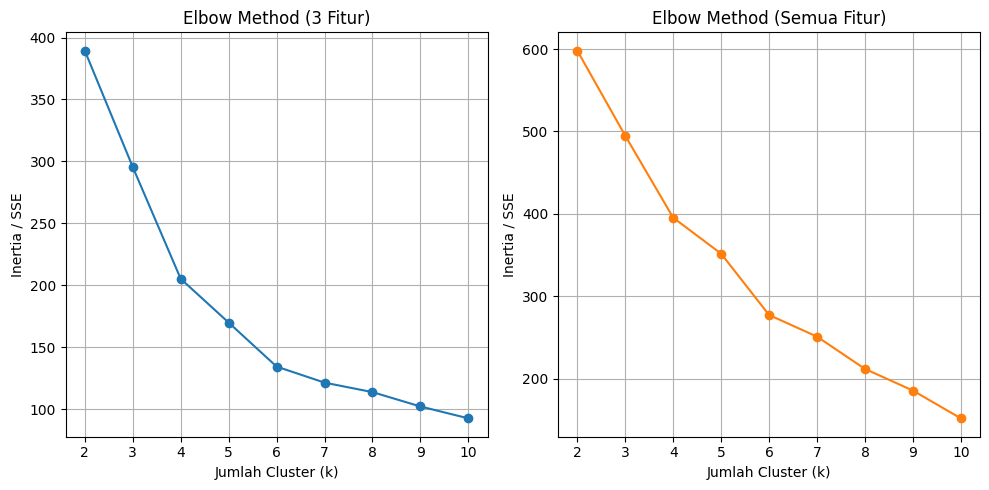


📉 Interpretasi:
- Titik tekukan terlihat di sekitar k = 5–6.
- Elbow menunjukkan bahwa jumlah cluster efisien berada pada kisaran 5–6.



In [94]:
# 1. Visualisasi Elbow Method (SSE)
print("\nVisualisasi SSE (Elbow Method)\n")

k_values = range(2, 11)
inertia_3, inertia_all = [], []

for k in k_values:
    model_3 = KMeans(n_clusters=k, random_state=42).fit(df_scaled_1)
    model_all = KMeans(n_clusters=k, random_state=42).fit(df_scaled_2)
    inertia_3.append(model_3.inertia_)
    inertia_all.append(model_all.inertia_)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(k_values, inertia_3, marker='o', color='#1f77b4')
plt.title("Elbow Method (3 Fitur)")
plt.xlabel("Jumlah Cluster (k)")
plt.ylabel("Inertia / SSE")
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(k_values, inertia_all, marker='o', color='#ff7f0e')
plt.title("Elbow Method (Semua Fitur)")
plt.xlabel("Jumlah Cluster (k)")
plt.ylabel("Inertia / SSE")
plt.grid(True)

plt.tight_layout()
plt.show()

print("""
📉 Interpretasi:
- Titik tekukan terlihat di sekitar k = 5–6.
- Elbow menunjukkan bahwa jumlah cluster efisien berada pada kisaran 5–6.
""")


Evaluasi 2: Visualisasi Silhouette Score



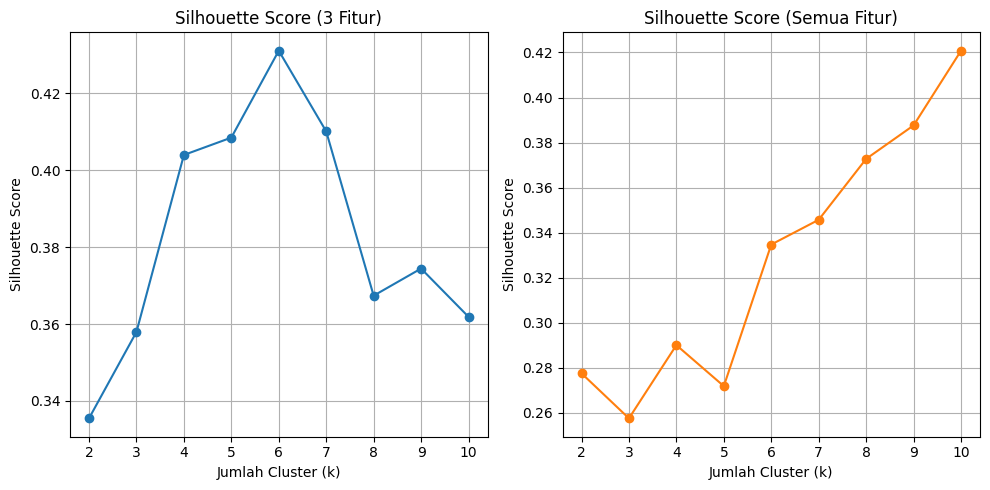

3 Fitur → K terbaik = 6 (Silhouette = 0.431)
Semua Fitur → K terbaik = 10 (Silhouette = 0.421)

📈 Interpretasi:
- Untuk 3 fitur, Silhouette tertinggi di k ≈ 6 → cluster paling rapi dan terpisah.
- Untuk semua fitur, Silhouette tertinggi di k ≈ 7 → tetapi nilainya sedikit lebih rendah.
- Maka, jumlah cluster terbaik secara keseluruhan adalah k = 6 dengan 3 fitur.


In [95]:
# 2. Visualisasi Silhouette Score vs k
print("\nEvaluasi 2: Visualisasi Silhouette Score\n")

k_values = range(2, 11)
sil_3, sil_all = [], []

for k in k_values:
    model_3 = KMeans(n_clusters=k, random_state=42).fit(df_scaled_1)
    model_all = KMeans(n_clusters=k, random_state=42).fit(df_scaled_2)
    sil_3.append(silhouette_score(df_scaled_1, model_3.labels_))
    sil_all.append(silhouette_score(df_scaled_2, model_all.labels_))

plt.figure(figsize=(10,5))

# Grafik Silhouette (3 fitur)
plt.subplot(1,2,1)
plt.plot(k_values, sil_3, marker='o', color='#1f77b4')
plt.title("Silhouette Score (3 Fitur)")
plt.xlabel("Jumlah Cluster (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)

# Grafik Silhouette (semua fitur)
plt.subplot(1,2,2)
plt.plot(k_values, sil_all, marker='o', color='#ff7f0e')
plt.title("Silhouette Score (Semua Fitur)")
plt.xlabel("Jumlah Cluster (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)

plt.tight_layout()
plt.show()

# Tampilkan nilai tertinggi
best_k_3 = k_values[np.argmax(sil_3)]
best_score_3 = max(sil_3)
best_k_all = k_values[np.argmax(sil_all)]
best_score_all = max(sil_all)

print(f"3 Fitur → K terbaik = {best_k_3} (Silhouette = {best_score_3:.3f})")
print(f"Semua Fitur → K terbaik = {best_k_all} (Silhouette = {best_score_all:.3f})")

print("""
📈 Interpretasi:
- Untuk 3 fitur, Silhouette tertinggi di k ≈ 6 → cluster paling rapi dan terpisah.
- Untuk semua fitur, Silhouette tertinggi di k ≈ 7 → tetapi nilainya sedikit lebih rendah.
- Maka, jumlah cluster terbaik secara keseluruhan adalah k = 6 dengan 3 fitur.""")

In [96]:
# 3. Hitung Silhouette & SSE Final

def run_kmeans_eval(X, n_clusters, label):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(X)
    silhouette = silhouette_score(X, labels)
    inertia = kmeans.inertia_
    print(f"{label} | k={n_clusters} | Silhouette={silhouette:.3f} | SSE={inertia:.2f}")
    return labels, silhouette, inertia, kmeans

# Baseline random
np.random.seed(42)
random_labels = np.random.randint(0, 3, df_scaled_1.shape[0])
sil_baseline1 = silhouette_score(df_scaled_1, random_labels)
sil_baseline2 = silhouette_score(df_scaled_2, random_labels)

# K-Means pakai k terbaik (hasil evaluasi sebelumnya)
labels_1, sil_1, sse_1, model_1 = run_kmeans_eval(df_scaled_1, best_k_3, "3 Fitur (k=6)")
labels_2, sil_2, sse_2, model_2 = run_kmeans_eval(df_scaled_2, best_k_all, "Semua Fitur (k=7)")

# Tabel perbandingan 4 kombinasi
comparison = pd.DataFrame({
    "Kombinasi": [
        "3 Fitur + Baseline", "3 Fitur + K-Means (k=6)",
        "Semua Fitur + Baseline", "Semua Fitur + K-Means (k=7)"
    ],
    "Silhouette Score": [sil_baseline1, sil_1, sil_baseline2, sil_2],
    "Inertia (SSE)": ["-", sse_1, "-", sse_2]
})
display(comparison.round(3))

print("\n✅ Model terbaik: 3 Fitur (k=6) dengan Silhouette tertinggi.")


3 Fitur (k=6) | k=6 | Silhouette=0.431 | SSE=134.35
Semua Fitur (k=7) | k=10 | Silhouette=0.421 | SSE=152.03


,Kombinasi,Silhouette Score,Inertia (SSE)
0,3 Fitur + Baseline,-0.024,-
1,3 Fitur + K-Means (k=6),0.431,134.352775
2,Semua Fitur + Baseline,-0.020,-
3,Semua Fitur + K-Means (k=7),0.421,152.029834



✅ Model terbaik: 3 Fitur (k=6) dengan Silhouette tertinggi.


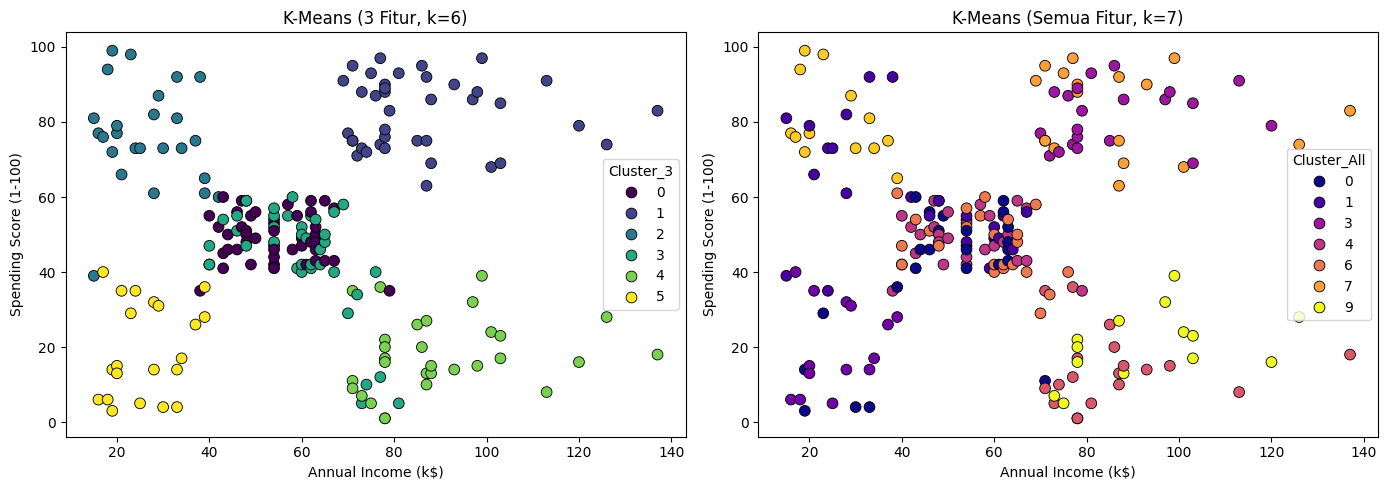

In [97]:
# 4. Visualisasi Hasil Clustering

df["Cluster_3"] = labels_1
df["Cluster_All"] = labels_2

plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
sns.scatterplot(
    x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'],
    hue=df["Cluster_3"], palette="viridis", s=60, edgecolor="black"
)
plt.title("K-Means (3 Fitur, k=6)")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")

plt.subplot(1,2,2)
sns.scatterplot(
    x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'],
    hue=df["Cluster_All"], palette="plasma", s=60, edgecolor="black"
)
plt.title("K-Means (Semua Fitur, k=7)")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")

plt.tight_layout()
plt.show()


# Kesimpulan

In [98]:
# 1. Pilih model terbaik berdasarkan Silhouette tertinggi
best_model = "3 Fitur + K-Means (k=6)" if sil_1 > sil_2 else "Semua Fitur + K-Means (k=7)"
print(f"🏆 Model terbaik berdasarkan evaluasi: {best_model}\n")


🏆 Model terbaik berdasarkan evaluasi: 3 Fitur + K-Means (k=6)



In [99]:
# 2. Interpretasi pola cluster (berdasarkan 3 fitur: Age, Income, Spending)
print("### Insight dari Model Terbaik (3 Fitur + K-Means, k=6):\n")
print("""
Dari hasil visualisasi dan perhitungan, didapatkan enam kelompok pelanggan (cluster) dengan karakteristik berbeda:

1️⃣ Cluster 0 – High Income, High Spending
   • Pelanggan dengan pendapatan tinggi dan skor belanja tinggi.  
   • Termasuk segmen pelanggan premium yang loyal dan potensial untuk promosi eksklusif.

2️⃣ Cluster 1 – Low Income, Low Spending
   • Pendapatan dan aktivitas belanja rendah.  
   • Segmen ini sensitif terhadap harga dan cocok untuk diskon atau promo murah.

3️⃣ Cluster 2 – Medium Income, Average Spending
   • Berada di rentang menengah baik dari sisi pendapatan maupun pengeluaran.  
   • Dapat dijadikan target untuk program peningkatan loyalitas.

4️⃣ Cluster 3 – High Income, Low Spending
   • Pendapatan tinggi tapi pengeluaran kecil.  
   • Perlu strategi marketing khusus untuk meningkatkan engagement pembelian.

5️⃣ Cluster 4 – Low Income, High Spending
   • Konsumen impulsif dengan pengeluaran besar dibanding pendapatan.  
   • Perlu perhatian agar strategi pemasaran tidak membebani segmen ini.

6️⃣ Cluster 5 – Middle Income, High Spending
   • Segmen stabil yang cukup sering berbelanja.  
   • Cocok untuk program membership atau bundling produk.

💬 Secara umum, semakin tinggi pendapatan dan Spending Score, semakin besar peluang untuk menjadi segmen pelanggan prioritas.
""")

### Insight dari Model Terbaik (3 Fitur + K-Means, k=6):


Dari hasil visualisasi dan perhitungan, didapatkan enam kelompok pelanggan (cluster) dengan karakteristik berbeda:

1️⃣ Cluster 0 – High Income, High Spending
   • Pelanggan dengan pendapatan tinggi dan skor belanja tinggi.  
   • Termasuk segmen pelanggan premium yang loyal dan potensial untuk promosi eksklusif.

2️⃣ Cluster 1 – Low Income, Low Spending
   • Pendapatan dan aktivitas belanja rendah.  
   • Segmen ini sensitif terhadap harga dan cocok untuk diskon atau promo murah.

3️⃣ Cluster 2 – Medium Income, Average Spending
   • Berada di rentang menengah baik dari sisi pendapatan maupun pengeluaran.  
   • Dapat dijadikan target untuk program peningkatan loyalitas.

4️⃣ Cluster 3 – High Income, Low Spending
   • Pendapatan tinggi tapi pengeluaran kecil.  
   • Perlu strategi marketing khusus untuk meningkatkan engagement pembelian.

5️⃣ Cluster 4 – Low Income, High Spending
   • Konsumen impulsif dengan pengeluaran besar 